In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# from path
from pathlib import Path
import os

# Get current directory
p = Path('.')



In [4]:
data = ImageDataBunch.from_folder(p/'images',  valid_pct=0.2, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

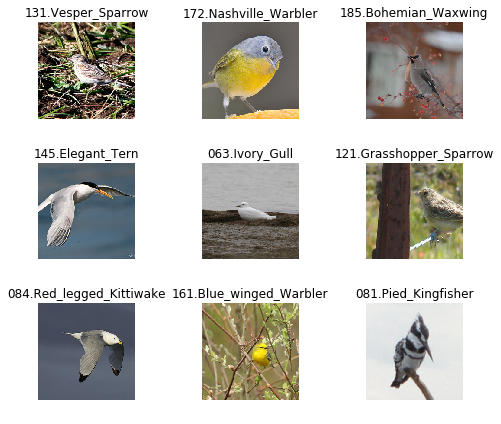

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [33]:
# memory bs 

bs = 64


In [6]:
#verifying classes 
print(data.classes)
len(data.classes),data.c

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Ver

(200, 200)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.985786,2.413179,0.553246,11:22
1,1.979968,1.384634,0.379296,11:16
2,1.356093,1.120579,0.305473,10:51
3,1.042062,1.085149,0.293594,10:20


that seems pretty inacurate : why?? More than 4 epochs will bring overfit

In [11]:
#saving model
learn.save('birds_stage-1')

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

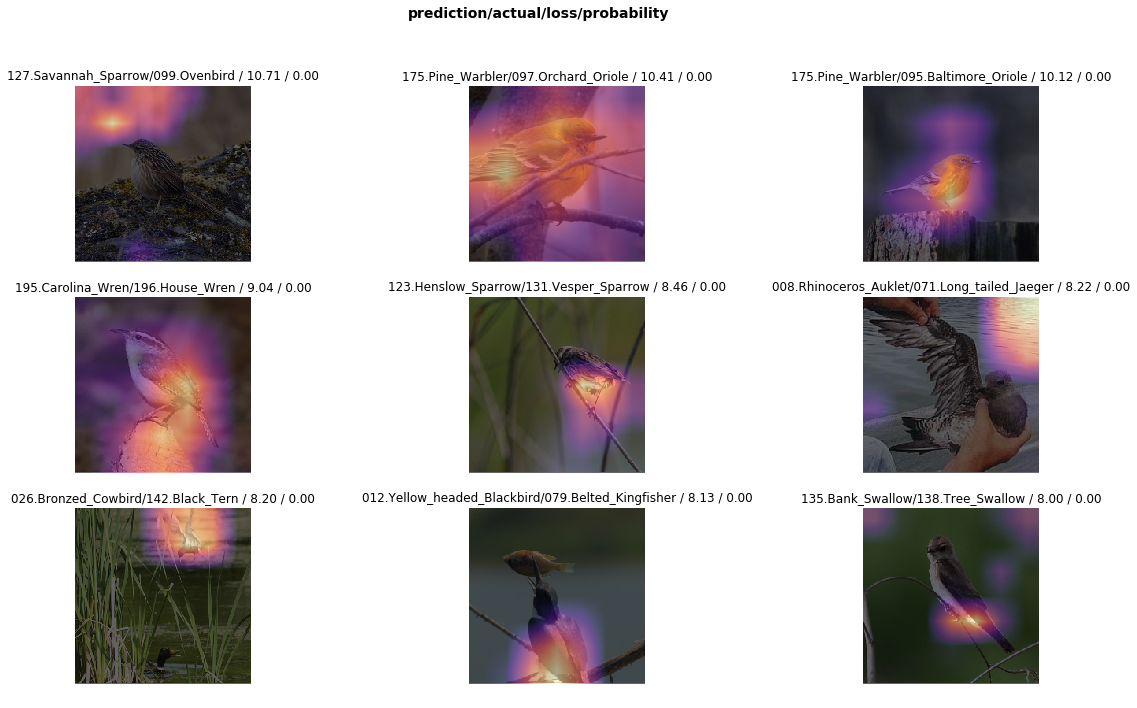

In [18]:
#most wrong 
interp.plot_top_losses(9, figsize=(20,11))

In [ ]:
interp.plot_top_losses

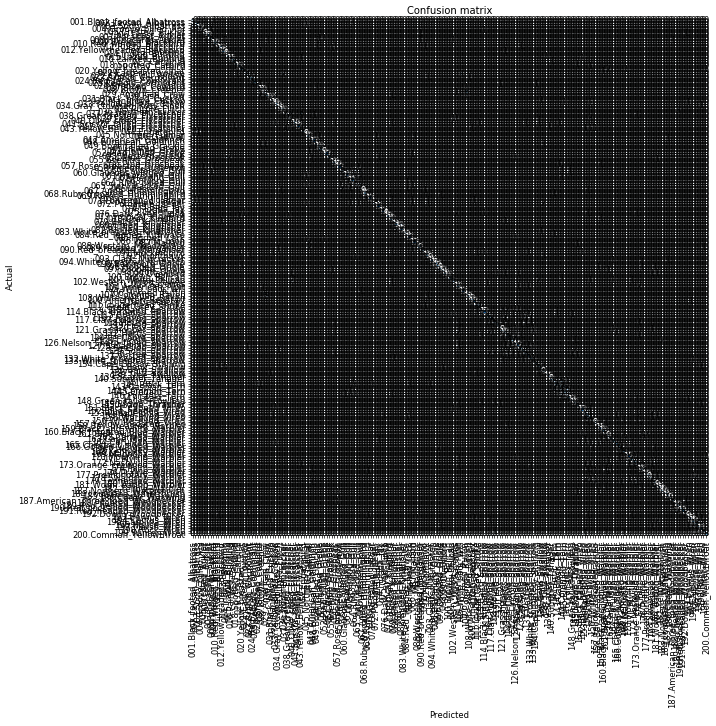

In [15]:
#interp.plot_confusion_matrix(figsize=(12,12), dpi=60) With 200 races, wa cant read a confusion matrice

In [16]:
interp.most_confused(min_val=2) 
# after reading it, most important errors seems normal (same subraces)

[('051.Horned_Grebe', '050.Eared_Grebe', 7),
 ('029.American_Crow', '107.Common_Raven', 6),
 ('037.Acadian_Flycatcher', '043.Yellow_bellied_Flycatcher', 6),
 ('141.Artic_Tern', '144.Common_Tern', 5),
 ('143.Caspian_Tern', '145.Elegant_Tern', 5),
 ('144.Common_Tern', '146.Forsters_Tern', 5),
 ('031.Black_billed_Cuckoo', '033.Yellow_billed_Cuckoo', 4),
 ('043.Yellow_bellied_Flycatcher', '037.Acadian_Flycatcher', 4),
 ('107.Common_Raven', '029.American_Crow', 4),
 ('144.Common_Tern', '141.Artic_Tern', 4),
 ('155.Warbling_Vireo', '153.Philadelphia_Vireo', 4),
 ('011.Rusty_Blackbird', '009.Brewer_Blackbird', 3),
 ('022.Chuck_will_Widow', '105.Whip_poor_Will', 3),
 ('036.Northern_Flicker', '189.Red_bellied_Woodpecker', 3),
 ('039.Least_Flycatcher', '155.Warbling_Vireo', 3),
 ('054.Blue_Grosbeak', '014.Indigo_Bunting', 3),
 ('059.California_Gull', '064.Ring_billed_Gull', 3),
 ('060.Glaucous_winged_Gull', '066.Western_Gull', 3),
 ('062.Herring_Gull', '060.Glaucous_winged_Gull', 3),
 ('062.Herr

In [19]:
#Next step is to try to improve the model, without more data
learn.unfreeze()

In [20]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.398215,1.058655,0.296563,10:16


In [22]:
learn.load('birds_stage-1');

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


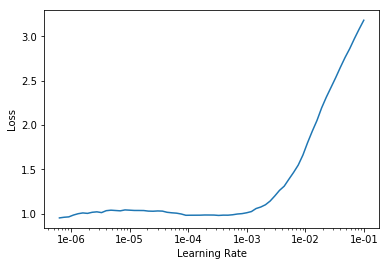

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.066434,1.042035,0.292321,10:08
1,0.833786,0.967046,0.273229,09:51


In [28]:
learn1 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [34]:
data = ImageDataBunch.from_folder(p/'images',  valid_pct=0.2, size=299, bs=bs//2, ds_tfms=get_transforms()).normalize(imagenet_stats)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


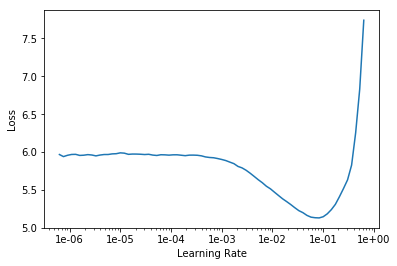

In [35]:
learn1.lr_find()
learn1.recorder.plot()

In [37]:
learn1.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,3.703156,2.294246,0.524820,10:33
1,1.900984,1.372207,0.377599,11:02
2,1.335081,1.129012,0.318201,12:02
3,0.990710,0.976378,0.277471,11:55
4,0.763466,0.924712,0.264319,11:45
5,0.604679,0.897919,0.253288,11:41
